# 调包实现

`gtol` termination condition is satisfied.
Function evaluations 22, initial cost 5.7307e+00, final cost 0.0000e+00, first-order optimality 0.00e+00.
Optimization converged in 22 iterations.
Optimal parameters: a = 0.5, b = 0.5


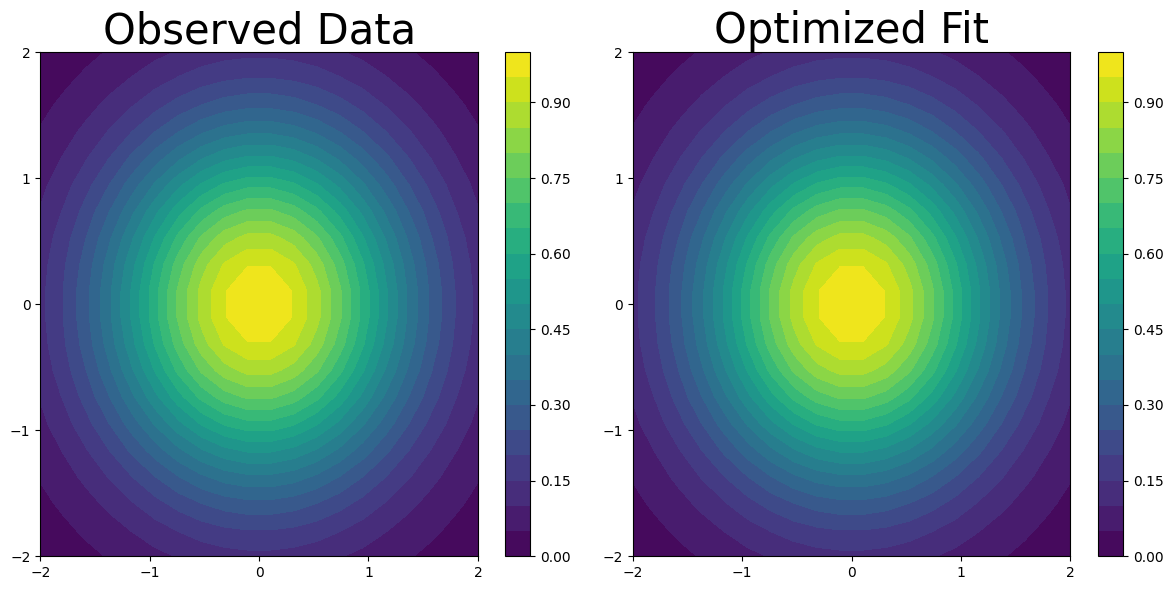

In [58]:
import os

import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

save_path = './hw4/'
os.makedirs(save_path, exist_ok=True)

# 自定义的测试函数
def test_function(params, x, y):
    a, b = params
    return np.exp(-a * x ** 2 - b * y ** 2)

# 定义误差函数
def error_function(params, x, y, z_observed):
    return (test_function(params, x, y) - z_observed).flatten()  # 将二维数组展平为一维数组

# 测试数据
x_data = np.linspace(-2, 2, 20)
y_data = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_data, y_data)
Z_observed = test_function([0.5, 0.5], X, Y)  # 使用真实参数生成观测数据

# 初始参数猜测值
params_initial = [1.0, 1.0]

# 定义回调函数，在每次迭代后记录参数值
fit_results = []
def callback(params):
    fit_results.append(params)

# 调用LM算法进行优化
result = least_squares(error_function, params_initial, args=(X, Y, Z_observed), method='lm', 
                       verbose=1)

# 提取最优参数和拟合值
params_optimal = result.x
Z_optimal = test_function(params_optimal, X, Y)

print(f"Optimization converged in {result.nfev} iterations.")
print(f"Optimal parameters: a = {params_optimal[0]}, b = {params_optimal[1]}")

# 绘制结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Observed Data', fontsize=30)
plt.contourf(X, Y, Z_observed, levels=20)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Optimized Fit', fontsize=30)
plt.contourf(X, Y, Z_optimal, levels=20)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.colorbar()

plt.tight_layout()
plt.savefig(f'{save_path}opt.png', dpi=300)

plt.show()



# 算法实现

C:\Users\PC\AppData\Local\Temp\ipykernel_20304\229200324.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q = float((mse - mse_tmp)/((0.5*dx.T*(u*dx - J.T*fx))[0,0]))


step = 1,abs(mse-lase_mse) = 22585683185122.80078125
step = 2,abs(mse-lase_mse) = 19529153689536.50781250
step = 3,abs(mse-lase_mse) = 2642913797318.67236328
step = 4,abs(mse-lase_mse) = 357653827356.12371826
step = 5,abs(mse-lase_mse) = 48393742089.67463684
step = 6,abs(mse-lase_mse) = 6545908055.41115665
step = 7,abs(mse-lase_mse) = 884614824.67731595
step = 8,abs(mse-lase_mse) = 119249795.89119282
step = 9,abs(mse-lase_mse) = 15966375.55438546
step = 10,abs(mse-lase_mse) = 2094113.78571897
step = 11,abs(mse-lase_mse) = 264374.63310777
step = 12,abs(mse-lase_mse) = 28815.28817163
step = 13,abs(mse-lase_mse) = 2168.34278089
step = 14,abs(mse-lase_mse) = 129.54934021
step = 15,abs(mse-lase_mse) = 31.94291588
step = 16,abs(mse-lase_mse) = 12.27988200
step = 17,abs(mse-lase_mse) = 5.51195742
step = 18,abs(mse-lase_mse) = 2.67906663
step = 19,abs(mse-lase_mse) = 1.35725893
step = 20,abs(mse-lase_mse) = 0.70274763
step = 21,abs(mse-lase_mse) = 0.36806797
step = 22,abs(mse-lase_mse) = 0.193

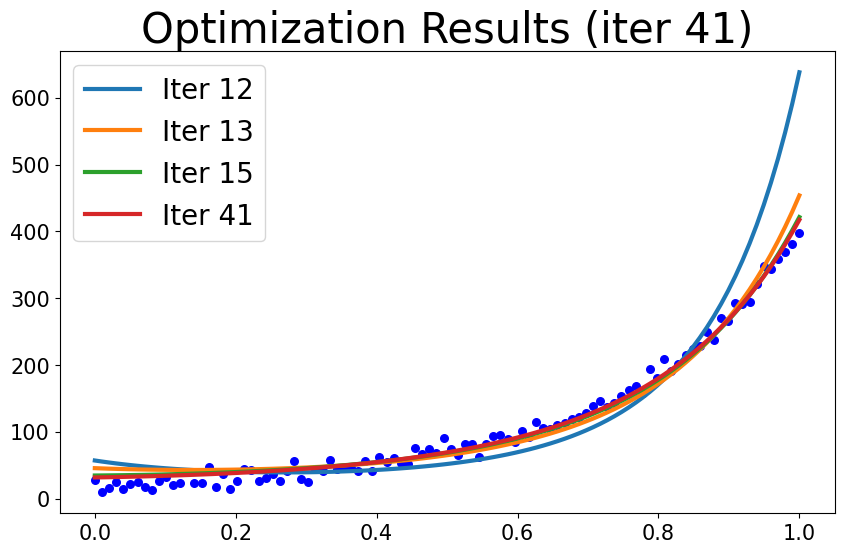

In [57]:

import numpy as np
from numpy import matrix as mat
from matplotlib import pyplot as plt
import random
random.seed(0)

n = 100
a1,b1,c1 = 1,2,3      # 这个是需要拟合的函数y(x) 的真实参数
h = np.linspace(0,1,n).reshape(100,1)       # 产生包含噪声的数据
y = [np.exp(a1*i**2+b1*i+c1)+random.gauss(0,8) for i in h]

J = mat(np.zeros((n,3)))      #雅克比矩阵
fx = mat(np.zeros((n,1)))     # f(x)  100*1  误差
fx_tmp = mat(np.zeros((n,1)))
xk = mat([[3.0],[9.0],[6.0]])

lase_mse = 0
step = 0
u,v= 1,2
conve = 10000  # 最大迭代次数
 
def Func(abc,iput):   # 需要拟合的函数，abc是包含三个参数的一个矩阵[[a],[b],[c]]
    a = abc[0,0]
    b = abc[1,0]
    c = abc[2,0]
    return np.exp(a*iput**2+b*iput+c)
 
def Deriv(abc,iput,n):  # 对函数求偏导
    x1 = abc.copy()
    x2 = abc.copy()
    x1[n,0] -= 0.000001
    x2[n,0] += 0.000001
    p1 = Func(x1,iput)
    p2 = Func(x2,iput)
    d = (p2-p1)*1.0/(0.000002)
    return d
         
xk_l = []  # 用来存放每次迭代的结果
while conve:
       
    mse,mse_tmp = 0,0
    step += 1  
    fx = Func(xk,h) - y
    mse += sum(fx**2)
    for j in range(3): 
        J[:,j] = Deriv(xk,h,j) # 数值求导                                                    
    mse /= n  # 范围约束
 
    H = J.T*J + u*np.eye(3)   # 3*3
    dx = -H.I * J.T*fx        # 
    xk_tmp = xk.copy()
    xk_tmp += dx
    fx_tmp =  Func(xk_tmp,h) - y  
    mse_tmp = sum(fx_tmp[:,0]**2)
    mse_tmp /= n
    #判断是否下降
    q = float((mse - mse_tmp)/((0.5*dx.T*(u*dx - J.T*fx))[0,0]))
    if q > 0:
        s = 1.0/3.0
        v = 2
        mse = mse_tmp
        xk = xk_tmp
        temp = 1 - pow(2*q-1,3)
 
        if s > temp:
            u = u*s
        else:
            u = u*temp
    else:
        u = u*v
        v = 2*v
        xk = xk_tmp
 
    print ("step = %d,abs(mse-lase_mse) = %.8f" %(step,abs(mse-lase_mse)))  
    if abs(mse-lase_mse)<0.000001:
        break
       
    lase_mse = mse  # 记录上一个 mse 的位置
    conve -= 1
    
    xk_l.append(xk)
    
print("Optimal parameters: ", xk)

#用拟合好的参数画图
plt.figure(figsize=(10, 6))
plt.title(f'Optimization Results (iter {len(xk_l)})', fontsize=30)
plt.scatter(h, y, s=30, c='b')
for i in range(len(xk_l)):
    if i == 11 or i == 12 or i == 14 or i == len(xk_l)-1:
        xk_i = xk_l[i]
        z = [Func(xk_i, j) for j in h]
        plt.plot(h, z, label=f'Iter {i+1}', linewidth=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.savefig(f'{save_path}opt_iter.png', dpi=300)

plt.show()
